In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
%%time
G = nx.read_edgelist("data/ca-AstroPh/out.ca-AstroPh", comments="%", nodetype=int)


CPU times: user 668 ms, sys: 32 ms, total: 700 ms
Wall time: 701 ms


In [4]:
%%time
degree_dict = dict(G.degree())
# print("\n\nNodes degrees: \n{}".format(G.degree()))
print("\n\nMax degree: \n{}".format(max(degree_dict.values())))
print("\n\nNode [3] degree: \n{}".format(G.degree([3])))
avg_degree = np.mean(list(degree_dict.values()))
print("\n\nAvg degree: \n   {}".format(avg_degree))



Max degree: 
504


Node [3] degree: 
[(3, 43)]


Avg degree: 
   21.101699429971767
CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 14 ms


In [3]:
%%time
print("\n\nAvg betweenness: \n{}".format(
        np.mean(list(nx.algorithms.centrality.betweenness_centrality(G,k=5000).values()))))
# print("\n\nBetweenness centrality: \n{}".format(
#         nx.algorithms.centrality.betweenness_centrality(G)))



Avg betweenness: 
0.00015457088143932458
CPU times: user 16min 16s, sys: 184 ms, total: 16min 16s
Wall time: 16min 16s


In [4]:
%%time
print("\n\nAvg closeness centrality: \n{}".format(
        np.mean(list(nx.algorithms.centrality.closeness_centrality(G,k=5000).values()))))
# print("\n\nCloseness centrality: \n{}".format(
#         nx.algorithms.centrality.closeness_centrality(G)))

TypeError: closeness_centrality() got an unexpected keyword argument 'k'

In [8]:
%%time
print("\n\nAvg shortest path betweenness centrality: \n{}".format(
        np.mean(list(nx.algorithms.centrality.betweenness_centrality(G).values()))))
# print("\n\nShortest path betweenness centrality: \n{}".format(
#         nx.algorithms.centrality.betweenness_centrality(G)))

KeyboardInterrupt: 

In [6]:
%%time
print("\n\nShortest path [1]=>[82]: \n{}".format(
        nx.algorithms.shortest_paths.generic.shortest_path(G, source=1, target=82)))



Shortest path [1]=>[82]: 
[1, 52, 82]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 103 µs


In [7]:
%%time
pgrank = nx.algorithms.link_analysis.pagerank_alg.pagerank(G, alpha=0.85)
# print("\n\nPage rank: \n{}".format(pgrank))
print("\n\nPage rank max: \n{}".format(max(pgrank.values())))



Page rank max: 
0.0007147584552175024
CPU times: user 7.26 s, sys: 100 ms, total: 7.36 s
Wall time: 7.36 s


In [8]:
%%time
print("\n\nAvg clustering coefficient: \n{}".format(nx.algorithms.cluster.average_clustering(G)))
# print("\n\nClustering coefficient: \n{}".format(nx.algorithms.cluster.clustering(G)))



Avg clustering coefficient: 
0.6306268351850275
CPU times: user 3.89 s, sys: 0 ns, total: 3.89 s
Wall time: 3.89 s


In [9]:
%%time
print("\n\nDiameter: \n{}".format(nx.diameter(G)))

NetworkXError: Found infinite path length because the graph is not connected

In [10]:
%%time
print("\n\nNumber of connected components: \n{}".format(nx.number_connected_components(G)))



Number of connected components: 
289
CPU times: user 72 ms, sys: 0 ns, total: 72 ms
Wall time: 70.5 ms


In [11]:
%%time
print("\n\nNetwork density: \n{}".format(nx.density(G)))



Network density: 
0.0011242247964822463
CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 11.6 ms


In [27]:
degrees = list(dict(G.degree()).values())
max_degree = max(degrees)

CPU times: user 41.7 s, sys: 9.25 s, total: 50.9 s
Wall time: 50.9 s


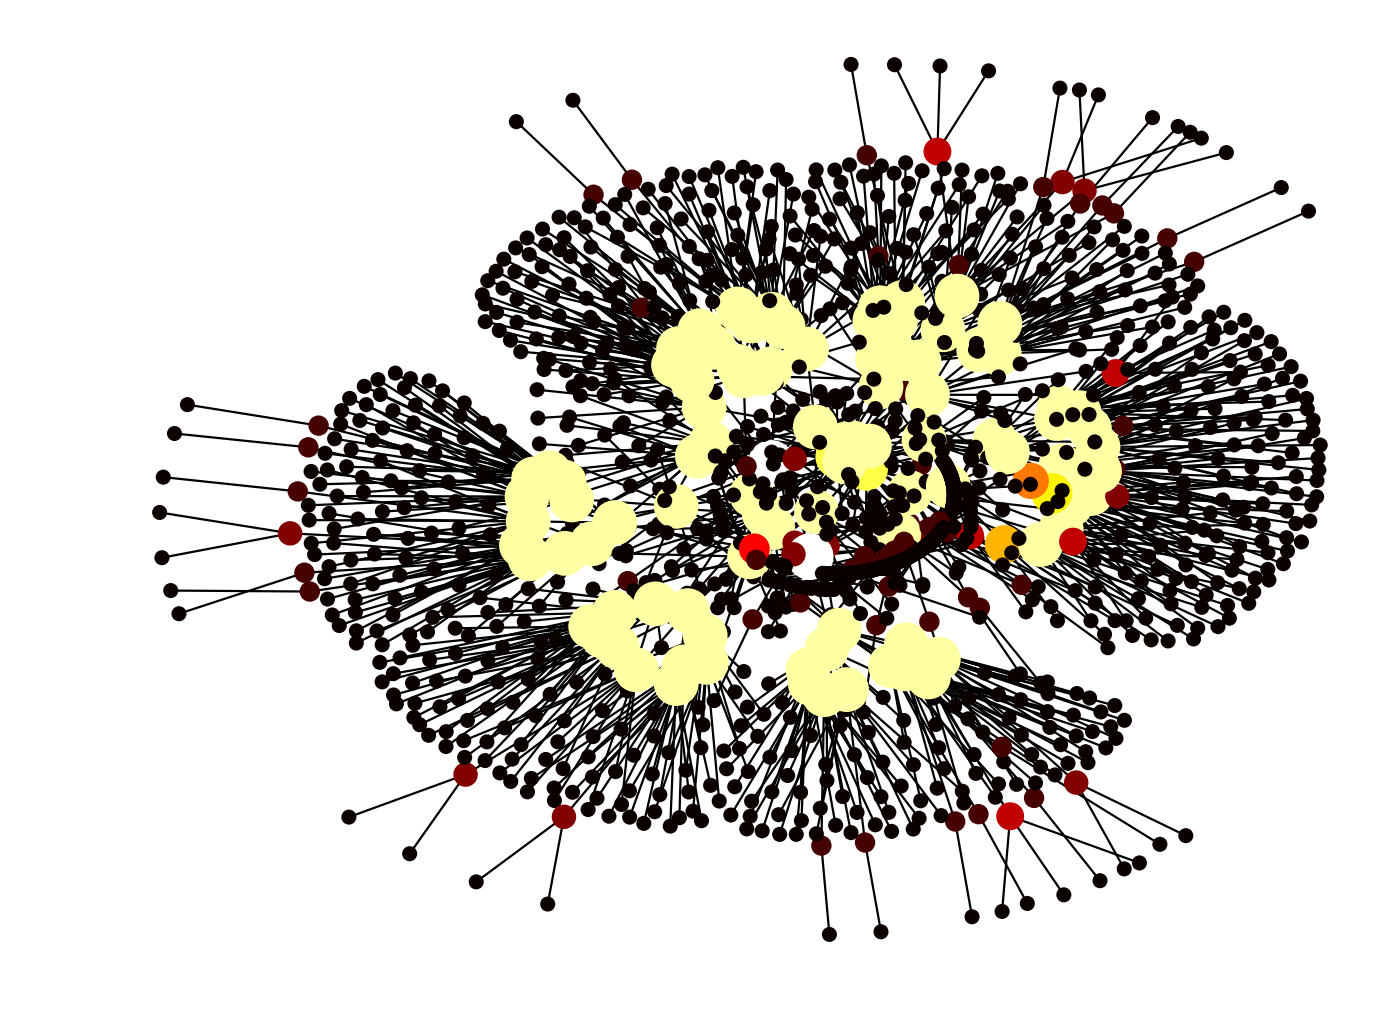

In [28]:
%%time
plt.figure(figsize=(8, 6), dpi=160, facecolor='w', edgecolor='k')
nx.draw_kamada_kawai(G, cmap='hot', vmin=min(degrees), vmax=max_degree, node_color=degrees, node_size=list(map(lambda x: 400*x/max_degree, degrees)))


CPU times: user 44 ms, sys: 36 ms, total: 80 ms
Wall time: 50.4 ms


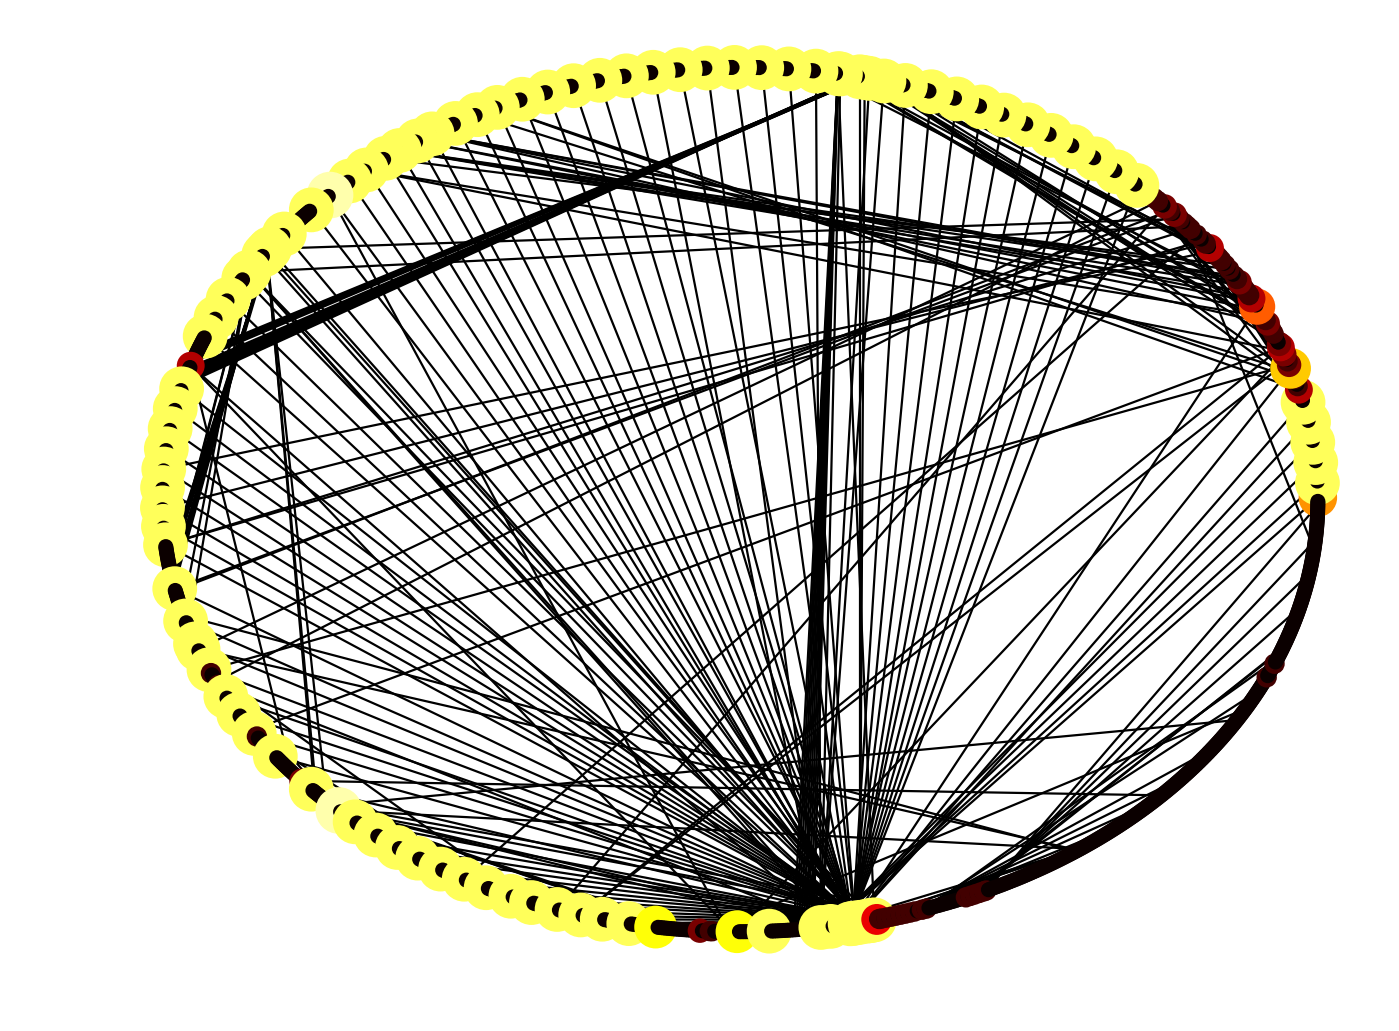

In [29]:
%%time
plt.figure(figsize=(8, 6), dpi=160, facecolor='w', edgecolor='k')
nx.draw_circular(G, cmap='hot', vmin=min(degrees), vmax=max_degree+1, node_color=degrees, node_size=list(map(lambda x: 400*x/max_degree, degrees)))


Degree distribution
CPU times: user 64 ms, sys: 0 ns, total: 64 ms
Wall time: 60.6 ms


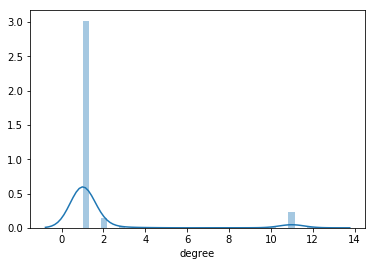

In [30]:
%%time
degree_dict = dict(G.degree())
print("\nDegree distribution")
sns.distplot(list(degree_dict.values()),axlabel="degree");


Clustering coefficient distribution
CPU times: user 68 ms, sys: 4 ms, total: 72 ms
Wall time: 67.7 ms


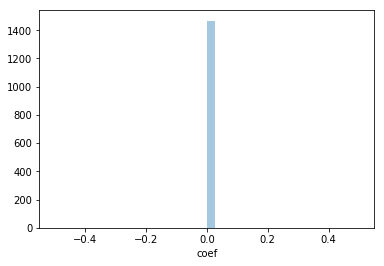

In [32]:
%%time
print("\nClustering coefficient distribution")
sns.distplot(list(nx.algorithms.cluster.clustering(G).values()),axlabel="coef", kde=False);


Shortest paths distribution
CPU times: user 2.12 s, sys: 4 ms, total: 2.13 s
Wall time: 2.13 s


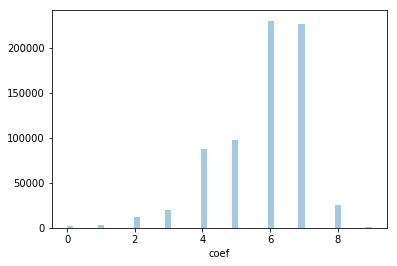

In [34]:
%%time
print("\nShortest paths distribution")
# print(list(itertools.chain(*list(map(lambda x: x[1].values(),nx.all_pairs_shortest_path_length(G))))))
sns.distplot(list(itertools.chain(*list(map(lambda x: x[1].values(),nx.all_pairs_shortest_path_length(G))))),axlabel="coef", kde=False);

In [58]:
%%time
A = nx.nx_agraph.to_agraph(G)
A.layout()
A.draw('A.png')

CPU times: user 28 ms, sys: 16 ms, total: 44 ms
Wall time: 174 ms
